In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

# Dataset

Asaniczka. (2025). Forex Exchange Rates Since 2004 (Updated Daily) [Data set]. Kaggle.

Website: https://www.kaggle.com/datasets/asaniczka/forex-exchange-rate-since-2004-updated-daily

DOI: 10.34740/kaggle/dsv/10558683

In [57]:
# I'm using Google Colab for the codes
# Read the "Daily Forex Rate" csv file from your personal google drive directory

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab/P1: Forex Regression/csv excel files/daily_forex_rates.csv' # change if needed

df = pd.read_csv(file_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,333.100155,2025-01-21
1,GHS,EUR,Ghanaian Cedi,15.476757,2025-01-21
2,HRK,EUR,Croatian Kuna,7.633949,2025-01-21
3,HNL,EUR,Honduran Lempira,26.201750,2025-01-21
4,HKD,EUR,Hong Kong Dollar,8.054134,2025-01-21
...,...,...,...,...,...
398371,JPY,EUR,Japanese Yen,133.350000,2004-09-01
398372,CAD,EUR,Canadian Dollar,1.596700,2004-08-31
398373,JPY,EUR,Japanese Yen,132.850000,2004-08-31
398374,AUD,EUR,Australian Dollar,1.729600,2004-08-31


Let's use the EUR to IDR-only exchange rates

In [ ]:
# Filter for currency 'IDR'
df_idr = df[df['currency'] == 'IDR']

# Sort by date
df_idr_sorted = df_idr.sort_values(by='date')

df_idr_sorted

,currency,base_currency,currency_name,exchange_rate,date
375440,IDR,EUR,Indonesian Rupiah,15107.000000,2014-11-24
375300,IDR,EUR,Indonesian Rupiah,15218.000000,2014-11-25
375189,IDR,EUR,Indonesian Rupiah,15270.000000,2014-11-26
375078,IDR,EUR,Indonesian Rupiah,15155.000000,2014-11-27
374842,IDR,EUR,Indonesian Rupiah,15241.000000,2014-11-28
...,...,...,...,...,...
691,IDR,EUR,Indonesian Rupiah,16900.133320,2025-01-17
601,IDR,EUR,Indonesian Rupiah,16896.841442,2025-01-18
365,IDR,EUR,Indonesian Rupiah,16896.841442,2025-01-19
235,IDR,EUR,Indonesian Rupiah,16867.854127,2025-01-20


Saving the IDR EUR rates:

In [ ]:
# Export to Google Drive as a CSV file (Only for IDR rates)
df_idr_sorted.to_csv('/content/drive/MyDrive/Colab/P1: Forex Regression/daily_forex_rates_idr.csv', index=False)

# Export to Google Drive as a CSV file (Only for IDR rates and take only every 1st date of each month)
from copy import deepcopy
daily_idr = deepcopy(df_idr_sorted)
daily_idr.index = daily_idr['date'].astype('datetime64[ns]')
monthly_idr = daily_idr[daily_idr.index.day == 1]
monthly_idr.to_csv('/content/drive/MyDrive/Colab/P1: Forex Regression/monhtly_forex_rates.csv', index=False)

## Plotting the exchange rate historical data
From the graph show below, we can see that as the dates go by, the rates overall will increase.

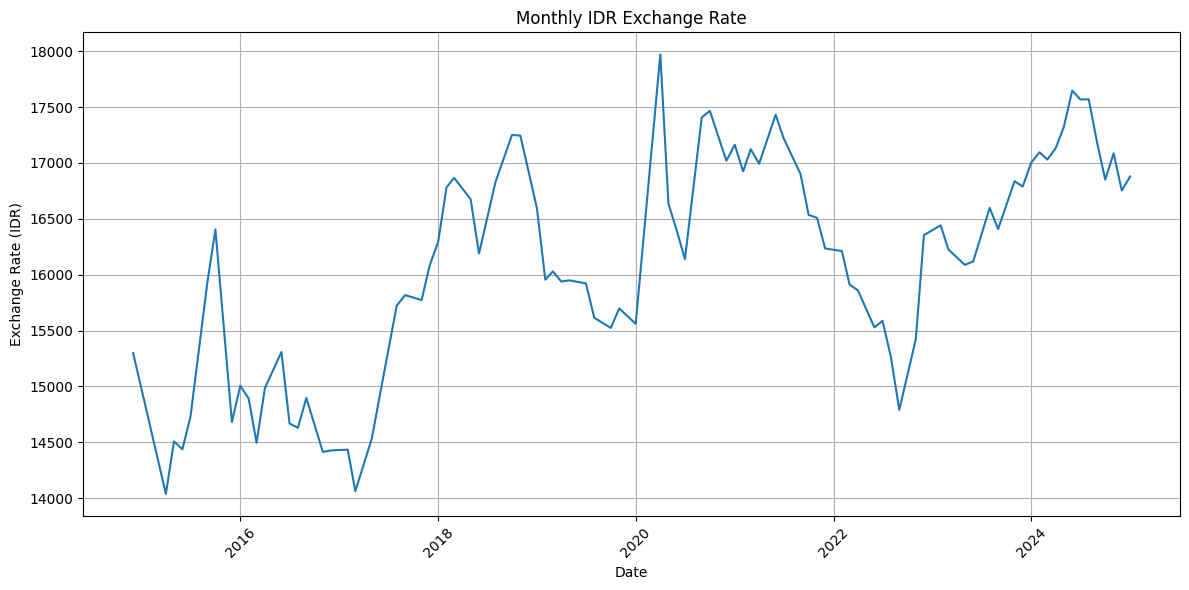

In [ ]:
# For plotting, limit it to only show monthly change (for every date 1 every month). After that plot the exchange rate

plt.figure(figsize=(12, 6))
plt.plot(monthly_idr.index, monthly_idr['exchange_rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.title('Monthly IDR Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Train, Valid and Test
Random picking Using the np.split() function

In [ ]:
# Train Valid Test Dataset here
d = df_idr_sorted
train, valid, test = np.split(d.sample(frac=1, random_state=42), [int(0.6*len(d)), int(0.8*len(d))])

# Assign X values and y values
X_train = train['date']
y_train = train['exchange_rate']
X_valid = valid['date']
y_valid = valid['exchange_rate']
X_test = test['date']
y_test = test['exchange_rate']

# Convert to datetime, then as numeric (integers)
X_train = X_train.astype('datetime64[ns]').astype(int)
X_valid = X_valid.astype('datetime64[ns]').astype(int)
X_test = X_test.astype('datetime64[ns]').astype(int)

len(X_train), len(X_valid), len(X_test)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(1666, 556, 556)

# Model 1: Using Simple Linear Regression
The linear regression shown on the graph below had prove that the rate will increase over time overall.

In [ ]:
# Apply the linear regression
lr_model = LinearRegression()
X_train_2d = np.array(X_train).reshape(-1, 1) #Reshape first to 2D format
lr_model.fit(X_train_2d, y_train)

print("Coefficient: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)
print("R2 Score: ", lr_model.score(X_train_2d, y_train))

Coefficient:  [6.99265951e-15]
Intercept:  4972.474694884006
R2 Score:  0.44560739323831655


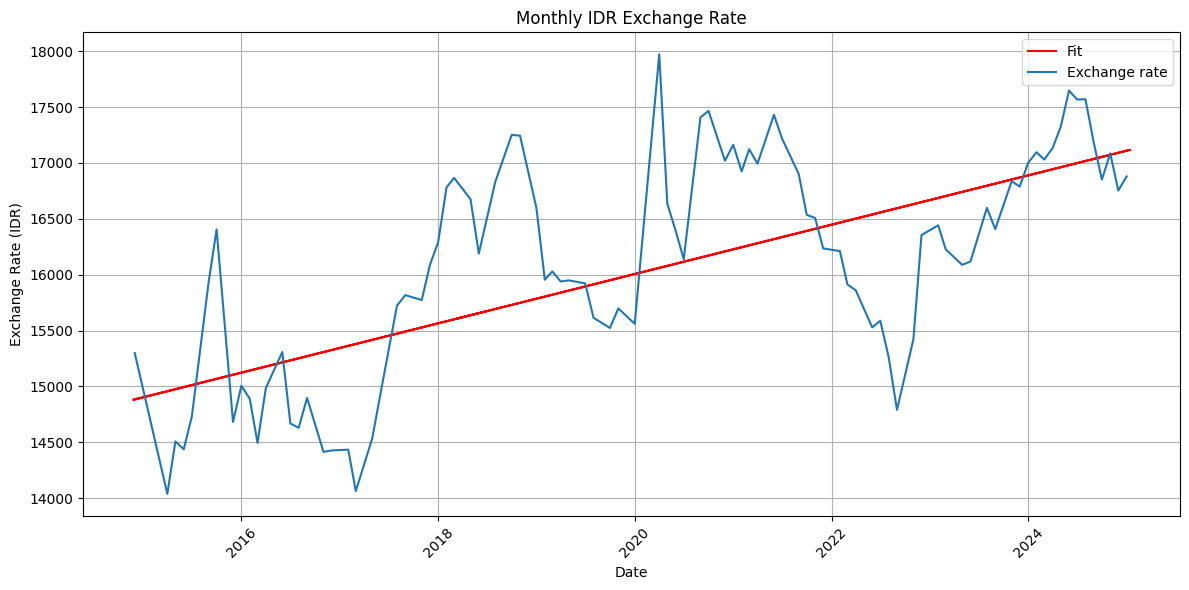

In [ ]:
# Predict the model
y_pred = lr_model.predict(np.array(X_test).reshape(-1, 1))

X_test_asdate = X_test.astype('datetime64[ns]')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X_test_asdate, y_pred, label = 'Fit', color = 'red')
plt.plot(monthly_idr.index, monthly_idr['exchange_rate'], label = 'Exchange rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.title('Monthly IDR Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

## Trying Manual Inputs
Manual inputs from Jan 2025 to Jan 2030

We can see that the rate will reach to Rp18,000 at one point some years later.

In [ ]:
# Manually input dates to predict
dates_to_predict = np.array([['2025-01-01'],['2026-01-01'],['2027-01-01'],['2028-01-01'],['2029-01-01'],['2030-01-01']])
dates_to_predict_int = dates_to_predict.astype('datetime64[ns]').astype(int)

exrate_pred = lr_model.predict(dates_to_predict_int.reshape(-1, 1))
exrate_pred = np.round(exrate_pred).astype(int)

for i in range(len(dates_to_predict)):
  print(f"{dates_to_predict[i][0]} predicted rate: {exrate_pred[i]}")

2025-01-01 predicted rate: 17110
2026-01-01 predicted rate: 17330
2027-01-01 predicted rate: 17551
2028-01-01 predicted rate: 17771
2029-01-01 predicted rate: 17992
2030-01-01 predicted rate: 18213


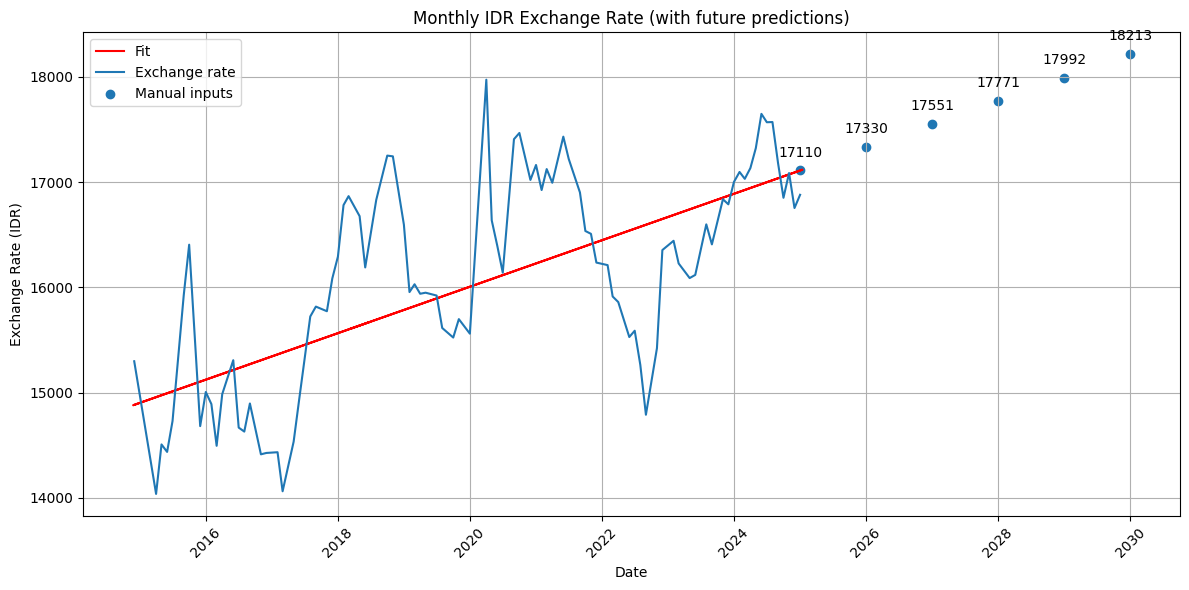

In [ ]:
# Plotting the manual inputs
plt.figure(figsize=(12, 6))
plt.plot(X_test_asdate, y_pred, label = 'Fit', color = 'red')
plt.plot(monthly_idr.index, monthly_idr['exchange_rate'], label = 'Exchange rate')
plt.scatter(dates_to_predict, exrate_pred, label = 'Manual inputs')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (IDR)')
plt.title('Monthly IDR Exchange Rate (with future predictions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

# Scatter plot with data labels
for i, txt in enumerate(exrate_pred):
    plt.annotate(txt, (dates_to_predict[i], exrate_pred[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

# Model 2: Using the ARIMA model to predict the trend
Because the ARIMA model need to identify the shape of the trend, We'll split the train and test dataset again without randomization.

In [ ]:
# Assigning Train and Test dataset again without randomization
train_size = int(0.8 * len(df_idr_sorted))
train_data = df_idr_sorted[:train_size]
test_data = df_idr_sorted[train_size:]

# Assign X values and y values
X_train = train_data['date']
y_train = train_data['exchange_rate']
X_test = test_data['date']
y_test = test_data['exchange_rate']

# Now you have train_data (80%) and test_data (20%) without any randomization
print(f"Train data length: {len(train_data)}")
print(f"Test data length: {len(test_data)}")

Train data length: 2222
Test data length: 556


Simplify the train and test dataset by taking every date 1 of each month:

In [ ]:
# Get the X_train, y_train, X_test, and y_test dataset only on date 1 of each month

# Split the data into training, validation, and testing sets
train_size = int(0.70 * len(monthly_idr))
test_size = len(monthly_idr) - train_size

X = monthly_idr.index.astype('datetime64[ns]').values.reshape(-1,1)
y = monthly_idr['exchange_rate'].values

X_train_monthly = X[:train_size]
y_train_monthly = y[:train_size]
X_test_monthly = X[train_size:]
y_test_monthly = y[train_size:]

print(f"X_train shape: {X_train_monthly.shape}, y_train shape: {y_train_monthly.shape}")
print(f"X_test shape: {X_test_monthly.shape}, y_test shape: {y_test_monthly.shape}")

X_train shape: (64, 1), y_train shape: (64,)
X_test shape: (28, 1), y_test shape: (28,)


## Identifying the p,d,q, and s values of the ARIMA model

> SARIMA(p, d, q)(P, D, Q)s

This represents a Seasonal Autoregressive Integrated Moving Average model. It's used for time series data that exhibits seasonality.

Parameters:

- **p**: The order of the autoregressive (AR) model. It refers to the number of lagged values of the dependent variable used in the model.  
  - e.g. if p = 2, the model will use the values from two previous time periods to predict the current value.

- **d**: The degree of differencing. This represents how many times the data needs to be differenced to make it stationary.

- **q**: The order of the moving average (MA) model. This refers to the number of lagged forecast errors used in the model.
  - e.g. if q = 1, the model will use the forecast error from the previous time period.

- s (Seasonal period): represents the number of periods in a seasonal cycle (for example "12" for monthly data).


Install the pmdarima libary to automatically identify the p,d, and q values of the ARIMA model.

In [ ]:
# !pip install pmdarima # download if not available yet
from pmdarima.arima import auto_arima

model = auto_arima(y_train_monthly, seasonal=True, m=12, suppress_warnings=True)
print(model.order)

We've finally got the (p,d,q) value as (2,1,2)

Next we need to identify which s_value we should use to ensure the trend will be more accurate. Note that we use the same (P,D,Q) value from (p,d,q).

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

results_table = pd.DataFrame(columns=["s_value", "mse_result", "r2_result"])

def seasonal_result(s_value):
  print("Generating s_value : ", s_value)
  order = (2, 1, 2)  # Example order (p, d, q)
  seasonal_order = (2, 1, 2, s_value)  # Example seasonal order (P, D, Q, s)

  # Build the SARIMAX Model
  sarimax_model = SARIMAX(y_train_monthly, order=order, seasonal_order=seasonal_order)
  sarimax_results = sarimax_model.fit(disp=False)  # disp=False suppresses convergence messages

  # Predict the SARIMAX model with the test data
  y_pred = sarimax_results.predict(start=len(y_train_monthly), end=len(y_train_monthly) + len(y_test_monthly) - 1, dynamic=False)

  # Calculate MSE and R2 for the SARIMAX model
  mse_sarimax = mean_squared_error(y_pred, y_test_monthly)
  r2_sarimax = r2_score(y_pred, y_test_monthly)

  # Assign to table
  results_table.loc[len(results_table)] = [s_value, mse_sarimax, r2_sarimax]

for i in range(4,31):
  seasonal_result(i)

Generating s_value :  4


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  5


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Generating s_value :  6


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Generating s_value :  7


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Generating s_value :  8


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  9


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  10


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  11


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  12


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  13


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  14


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  15


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  16


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  17


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Generating s_value :  18


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  19


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  20


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  21


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  22


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  23


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  24


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  25


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  26


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  27


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  28


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  29


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Generating s_value :  30


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Sort the result_table descendingly from the highest r2_score to the lowest r2_score
results_table = results_table.sort_values(by=['r2_result'], ascending=False)
results_table

,s_value,mse_result,r2_result
22,26.0,2.940612e+05,0.642815
23,27.0,2.781913e+05,0.594210
24,28.0,5.321295e+05,0.376841
21,25.0,8.388493e+05,0.111441
20,24.0,1.433370e+06,-0.349003
19,23.0,1.122730e+06,-1.214741
25,29.0,1.602089e+06,-1.859899
18,22.0,1.792717e+06,-1.950766
16,20.0,1.159510e+06,-2.241389
17,21.0,1.388803e+06,-2.693242


## Applying the SARIMA model
Using s_value of 26

Notice that this model has a higher R2 score (0.64) compared to the linear regression model before (0.44)

In [ ]:
# Applying the SARIMA model
# The regression model will produce a trend with the lowest MSE error with s_value = 27
order = (2, 1, 2)  # Example order (p, d, q)
seasonal_order = (2, 1, 2, 26)  # Example seasonal order (P, D, Q, s), use "26" as the s_value
sarimax_model = SARIMAX(y_train_monthly, order=order, seasonal_order=seasonal_order)
sarimax_results = sarimax_model.fit(disp=False)
y_sarimax_predict = sarimax_results.predict(start=len(y_train_monthly), end=len(y_train_monthly) + len(y_test_monthly) - 1, dynamic=False)

# Print the MSE and R2 score of the ARIMA model

from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE Score : {mean_squared_error(y_sarimax_predict, y_test_monthly)}")
print(f"R2 Score : {r2_score(y_sarimax_predict, y_test_monthly)}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE Score : 294061.1959202876
R2 Score : 0.6428147808236175


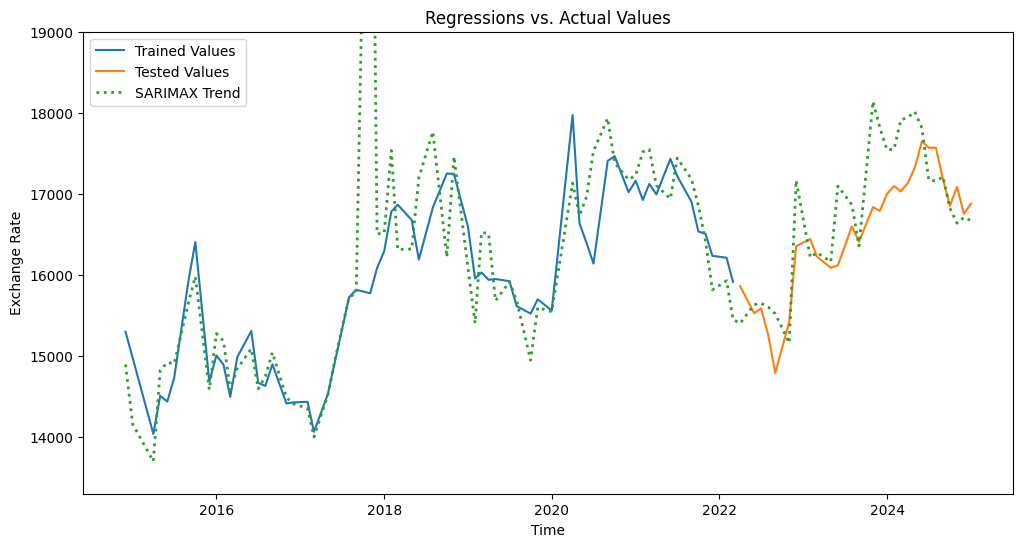

In [ ]:
y_sarimax_trend = sarimax_results.predict(start=1, end=len(y_train_monthly) + len(y_test_monthly))

# Plotting the SARIMAX trend
plt.figure(figsize=(12, 6))
plt.plot(X_train_monthly, y_train_monthly, label = 'Trained Values')
plt.plot(X_test_monthly, y_test_monthly, label = 'Tested Values')
plt.plot(monthly_idr.index, y_sarimax_trend, label='SARIMAX Trend', linestyle='dotted', linewidth=2)
plt.ylim(13300,19000)
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.title('Regressions vs. Actual Values')
plt.legend()
plt.show()

## Trying Manual Inputs (Extended until 2030)

Manual inputs from Jan 2025 to Jan 2030

We can see that the rate will reach to Rp20,000 at one point some years later, which is not detected by the simpler Linear Regression model.

In [ ]:
# Generate a series of dates from 2025-01-01, 2025-02-01, 2025-03-01 all the way to 2030-12-01
date_rng = pd.date_range(start='2025-01-01', end='2030-12-01', freq='MS')
dates_to_predict = pd.DataFrame({'Date': date_rng})
dates_to_predict

,Date
0,2025-01-01
1,2025-02-01
2,2025-03-01
3,2025-04-01
4,2025-05-01
...,...
67,2030-08-01
68,2030-09-01
69,2030-10-01
70,2030-11-01


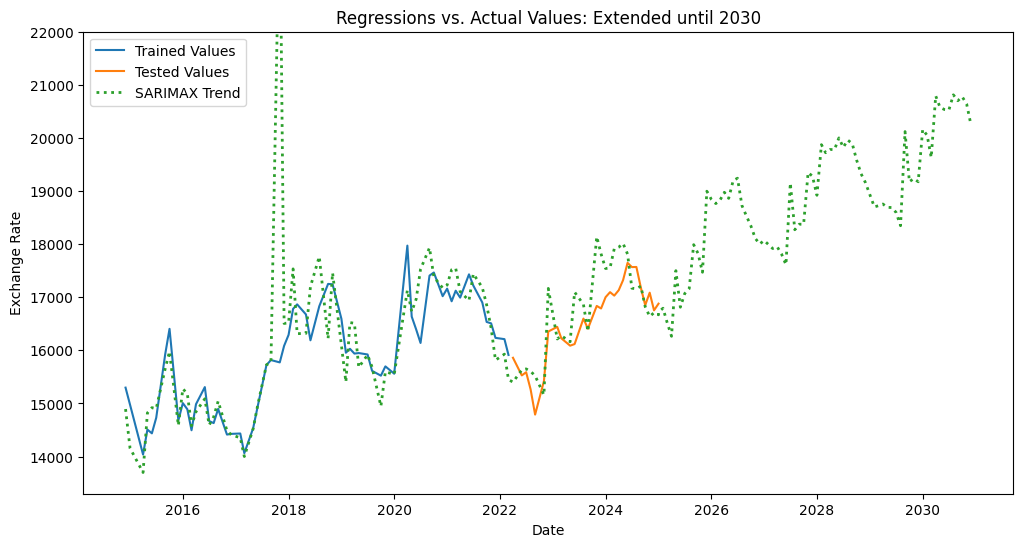

In [ ]:
# Predict the trend
y_sarimax_trend = sarimax_results.predict(start=1, end=len(y_train_monthly) + len(y_test_monthly) + len(dates_to_predict))
X_combined = np.concatenate((X_train_monthly, X_test_monthly, dates_to_predict))

# Plotting the SARIMAX trend
plt.figure(figsize=(12, 6))
plt.plot(X_train_monthly, y_train_monthly, label = 'Trained Values')
plt.plot(X_test_monthly, y_test_monthly, label = 'Tested Values')
plt.plot(X_combined, y_sarimax_trend, label='SARIMAX Trend', linestyle='dotted', linewidth=2)
plt.ylim(13300,22000)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Regressions vs. Actual Values: Extended until 2030')
plt.legend()
plt.show()

In [ ]:
# Save results into a table
table_combined = pd.DataFrame(columns=["Date", "Exchange Rate"])
table_combined["Date"] = X_combined.ravel()
table_combined["Exchange Rate"] = y_sarimax_trend
table_combined

,Date,Exchange Rate
0,2014-12-01,14894.112632
1,2015-01-01,14158.559223
2,2015-04-01,13699.917942
3,2015-05-01,14821.063466
4,2015-06-01,14920.429244
...,...,...
159,2030-08-01,20811.771293
160,2030-09-01,20700.923958
161,2030-10-01,20775.644104
162,2030-11-01,20637.959177


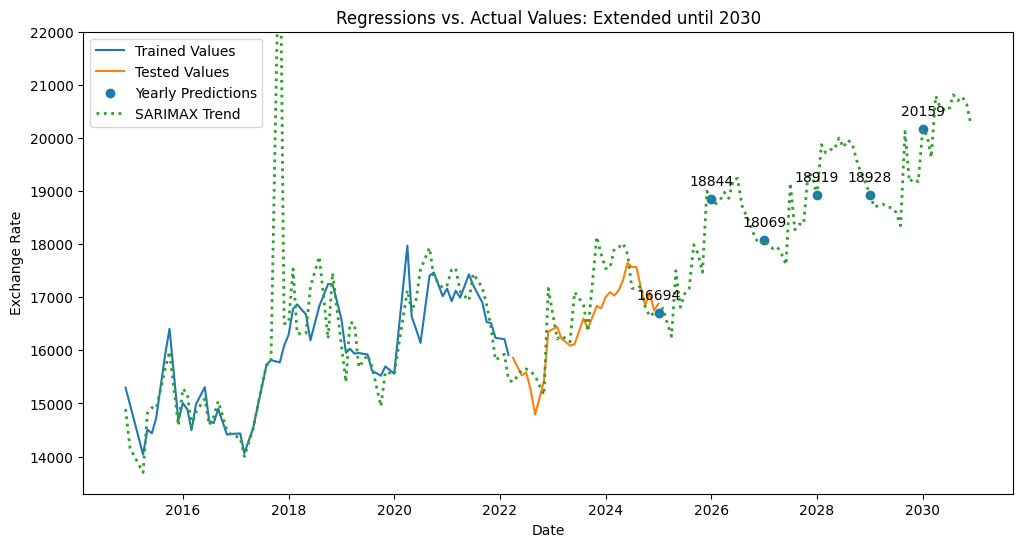

In [ ]:
# Identify every January 1 results after 2024. Filter for January results only
january_table = table_combined[
    (table_combined["Date"].dt.month == 1) & (table_combined["Date"].dt.day == 1) & (table_combined["Date"].dt.year >= 2025)
]
# Group by date and calculate the mean of the 'Exchange Rate'
january_table = january_table.groupby("Date")["Exchange Rate"].mean().reset_index()
january_dates = january_table["Date"]
january_predictions = january_table["Exchange Rate"]

# Plotting the SARIMAX trend
plt.figure(figsize=(12, 6))
plt.plot(X_train_monthly, y_train_monthly, label = 'Trained Values')
plt.plot(X_test_monthly, y_test_monthly, label = 'Tested Values')
plt.scatter(january_dates, january_predictions, label = 'Yearly Predictions')
plt.plot(X_combined, y_sarimax_trend, label='SARIMAX Trend', linestyle='dotted', linewidth=2)
plt.ylim(13300,22000)
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Regressions vs. Actual Values: Extended until 2030')

# Annotate the scatter plot points
import matplotlib.dates as mdates

for i, row in january_table.iterrows():
    date_num = row['Date']
    exchange_num = int(row['Exchange Rate'])
    plt.annotate(exchange_num, (date_num, exchange_num), textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()
plt.show()